In [5]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline

# from nnn import train_nn as tnn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

## GNN

In [2]:
gnn_df = pd.read_csv('./data/wandb_gnn/wandb_export_2023-11-01T04_26_32.987-07_00.csv', index_col=0)

In [26]:
sweep_df = pd.read_csv('./data/wandb_gnn/wandb_export_2023-11-06T16_04_54.870-08_00.csv', index_col=0)

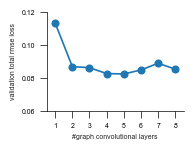

In [43]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,9), sweep_df['test_rmse'], 'o-')
ax.set_ylim([.06,.12])
ax.set_xlim([0.5,8.5])
ax.set_xlabel('#graph convolutional layers')
ax.set_ylabel('validation total rmse loss')
util.beutify(ax, x_locator=1, y_locator=.02, shrink=True)
util.save_fig('./fig/Fig5/n_graphconv_vs_test_rmse.pdf')

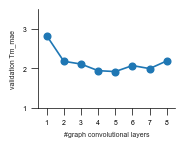

In [40]:
y = 'Tm_mae'
fig, ax = plt.subplots()
ax.plot(np.arange(1,9), sweep_df[y], 'o-')
ax.set_ylim([1,3.5])
ax.set_xlim([0.5,8.5])
ax.set_xlabel('#graph convolutional layers')
ax.set_ylabel('validation %s'%y)
util.beutify(ax, x_locator=1, y_locator=1, shrink=True)
util.save_fig('./fig/Fig5/n_graphconv_vs_%s.pdf'%y)

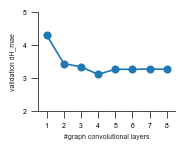

In [41]:
y = 'dH_mae'
fig, ax = plt.subplots()
ax.plot(np.arange(1,9), sweep_df[y], 'o-')
ax.set_ylim([2,5])
ax.set_xlim([0.5,8.5])
ax.set_xlabel('#graph convolutional layers')
ax.set_ylabel('validation %s'%y)
util.beutify(ax, x_locator=1, y_locator=1, shrink=True)
util.save_fig('./fig/Fig5/n_graphconv_vs_%s.pdf'%y)

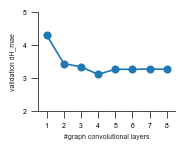

In [41]:
y = 'dH_mae'
fig, ax = plt.subplots()
ax.plot(np.arange(1,9), sweep_df[y], 'o-')
ax.set_ylim([2,5])
ax.set_xlim([0.5,8.5])
ax.set_xlabel('#graph convolutional layers')
ax.set_ylabel('validation %s'%y)
util.beutify(ax, x_locator=1, y_locator=1, shrink=True)
util.save_fig('./fig/Fig5/n_graphconv_vs_%s.pdf'%y)

## Test

In [236]:
dir_name = './data/wandb_gnn/test_200epoch/'
fn_list = os.listdir(dir_name)
report_dict = {fn.replace('.csv','') : pd.read_csv(os.path.join(dir_name, fn), index_col=0)
                   for fn in fn_list if fn.endswith('.csv')}

In [237]:
report_dict.keys()

dict_keys(['summary', 'Tm_mae_arr', 'train_rmse', 'Tm_mae_adj_ov', 'test_rmse', 'Tm_mae_adj_lit_uv', 'soft-yoghurt_ov_table', 'soft-yoghurt_lit_uv_table', 'Tm_mae_adj_arr', 'use_train_set_ratio_sweep'])

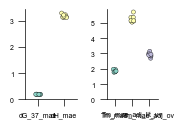

In [161]:
fig, ax = plt.subplots(1, 2, figsize=(5*cm,3.5*cm))
kwargs = dict(palette='Set3', edgecolor='k', linewidth=.25, size=3)
sns.stripplot(report_dict['summary'][['dG_37_mae', 'dH_mae']], ax=ax[0], **kwargs)

sns.stripplot(report_dict['summary'][['Tm_mae', 'Tm_mae_adj_lit_uv', 'Tm_mae_adj_ov']], ax=ax[1], **kwargs)

for a in ax:
    a.set_ylim(bottom=0)
    util.beutify(a, shrink=True, do_not_resize=True)
    
plt.tight_layout()
util.save_fig('./fig/Fig5/test_200epoch_mae.pdf')

In [200]:
def clean_df(df):
    df = df[[c for c in df.columns if not '__M' in c]]
    df['epoch'] = df.reset_index().Step.apply(lambda x: x+10).values
    df = pd.melt(df, id_vars=['epoch'])
    return df

# report_dict['Tm_corr_lit_uv'] = clean_df(report_dict['Tm_corr_lit_uv'])

KeyError: 'Tm_corr_lit_uv'

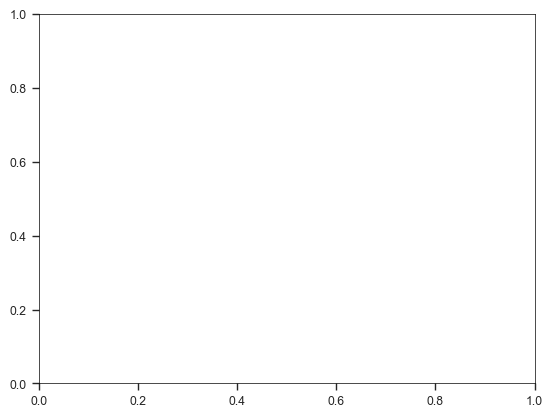

In [163]:
fig, ax = plt.subplots()
sns.lineplot(report_dict['Tm_corr_lit_uv'], x='Step', y='value', errorbar='ci', ax=ax)
sns.lineplot(clean_df(report_dict['Tm_corr_ov']), x='Step', y='value', errorbar='ci', ax=ax)
ax.set_xlabel('epoch')
ax.set_ylabel('correlation')
ax.set_ylim([0,1])
util.beutify(ax, shrink=True)
util.save_fig('./fig/Fig5/test_200epoch_Tm_corr.pdf')

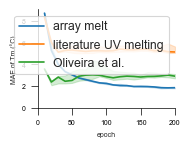

In [203]:
fig, ax = plt.subplots()
kwargs = dict(x='epoch', y='value', estimator='median', errorbar=('pi', 95), ax=ax)
sns.lineplot(clean_df(report_dict['Tm_mae_adj_arr']), label='array melt', **kwargs)
sns.lineplot(clean_df(report_dict['Tm_mae_adj_lit_uv']), label='literature UV melting', **kwargs)
sns.lineplot(clean_df(report_dict['Tm_mae_adj_ov']), label='Oliveira et al.', **kwargs)

ax.set_xlim([0,200])
ax.set_ylim(bottom=0)
ax.set_xlabel('epoch')
ax.set_ylabel('MAE of Tm (°C)')
util.beutify(ax, shrink=True)
plt.legend()

util.save_fig('./fig/Fig5/test_200epoch_mae_history.pdf')

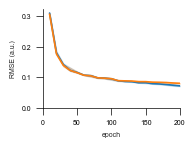

In [206]:
fig, ax = plt.subplots()
kwargs = dict(x='epoch', y='value', estimator='median', errorbar=('pi', 95), ax=ax)
sns.lineplot(clean_df(report_dict['train_rmse']), label='train RMSE', **kwargs)
sns.lineplot(clean_df(report_dict['test_rmse']), label='test RMSE', **kwargs)
ax.set_xlim([0,200])
ax.set_ylim(bottom=0)
ax.set_xlabel('epoch')
ax.set_ylabel('RMSE (a.u.)')
ax.get_legend().remove()
util.beutify(ax, shrink=True, y_locator=.1)

util.save_fig('./fig/Fig5/test_200epoch_train_test_rmse_history.pdf')

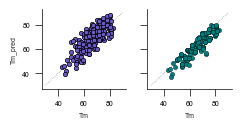

In [233]:
lit_uv_val_result_df = report_dict['soft-yoghurt_lit_uv_table'].reset_index()
val_df = pd.read_csv('./data/models/raw/combined_dataset.csv', index_col=0)
data_split = fileio.read_json('./data/models/raw/combined_data_split.json')

# Get lit_uv_df
split = 'test'
dataset_name = 'lit_uv'
dataset_mask =val_df.eval('dataset == "%s"' % dataset_name)
split_ind = np.searchsorted(val_df.index, 
        data_split[split+'_ind'])
ind = list(set(split_ind) & set(np.where(dataset_mask)[0]))
lit_uv_df = val_df.iloc[ind,:]

lit_uv_val_result_df['sodium'] = lit_uv_df['sodium'].values
lit_uv_val_result_df['GC'] = lit_uv_df.RefSeq.apply(util.get_GC_content).values

lit_uv_val_result_df['Tm_pred_adj'] = lit_uv_val_result_df.apply(
    lambda row: util.get_Na_adjusted_Tm(Tm=row.Tm_pred, dH=None, GC=row.GC, Na=.088, from_Na=row.sodium), 
    axis=1)
# lit_uv_val_result_df['Tm_adj'] = lit_uv_val_result_df.apply(
#     lambda row: util.get_Na_adjusted_Tm(Tm=row.Tm, dH=None, GC=row.GC, Na=row.sodium, from_Na=.15), 
#     axis=1)

fig,ax = plt.subplots(1, 2, figsize=(1.5*4.25*cm, 3.5*cm), sharex=True, sharey=True)
sns.scatterplot(data=lit_uv_val_result_df, x='Tm', y='Tm_pred',
                color='slateblue', marker='o', edgecolor='k', linewidth=.5, s=10, ax=ax[0])
# ax[0].set_title('before correction')

sns.scatterplot(data=lit_uv_val_result_df, x='Tm', y='Tm_pred_adj',
                color='teal', marker='o', edgecolor='k', linewidth=.25, s=10, ax=ax[1])
# ax[1].set_title('after salt correction')

lim=[30,90]
for a in ax:
    a.plot(lim, lim, 'gray', linestyle=':', linewidth=.5, zorder=0)

util.beutify_all_ax(ax, force_same_xy=True, x_locator=20, y_locator=20, shrink=True, do_not_resize=True)
plt.tight_layout()
util.save_fig('./fig/Fig5/lit_uv_val_before_after_salt_correction.pdf')

In [211]:
ov_val_result_df

,Tm_pred,n_mm,sodium,GC,Tm_pred_adj
Tm,,,,,
72.328307,65.199999,1,0.0675,65.789474,63.404260
64.210759,53.100001,2,0.0675,63.157895,51.398546
62.149270,53.100001,2,0.0675,60.526316,51.367012
63.671260,53.100001,2,0.0675,63.157895,51.398546
67.292825,53.100001,3,0.0675,60.526316,51.367012
...,...,...,...,...,...
73.608753,65.500000,0,0.0675,63.157895,63.667114
62.183138,53.199999,2,0.0675,63.157895,51.497504
61.035976,53.199999,2,0.0675,57.894737,51.434403


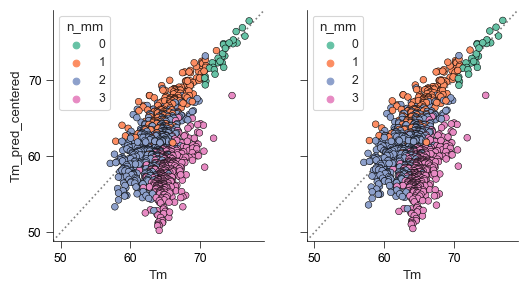

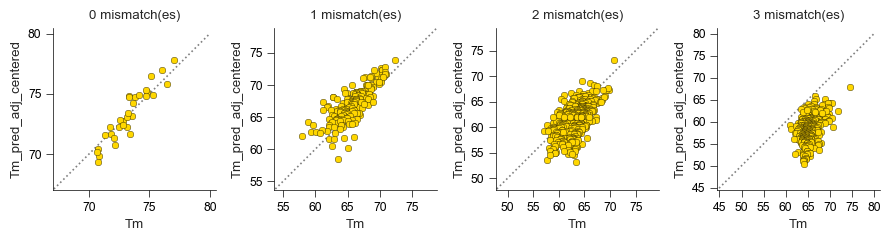

In [217]:
ov_val_result_df = report_dict['soft-yoghurt_ov_table'].reset_index()#pd.read_csv('./data/wandb_gnn/test_8_runs/ov_table_rural-haze-247.csv')
val_df = pd.read_csv('./data/models/raw/combined_dataset.csv', index_col=0)
data_split = fileio.read_json('./data/models/raw/combined_data_split.json')

# Get ov_df
split = 'test'
dataset_name = 'ov'
dataset_mask =val_df.eval('dataset == "%s"' % dataset_name)
split_ind = np.searchsorted(val_df.index, 
        data_split[split+'_ind'])
ind = list(set(split_ind) & set(np.where(dataset_mask)[0]))
ov_df = val_df.iloc[ind,:]

ov_df['n_mm'] = ov_df.TargetStruct.apply(lambda x: int(x.count('.')/2))
ov_val_result_df['n_mm'] = ov_df['n_mm'].values
ov_val_result_df['sodium'] = ov_df['sodium'].values
ov_val_result_df['GC'] = ov_df.RefSeq.apply(util.get_GC_content).values

ov_val_result_df['Tm_pred_adj'] = ov_val_result_df.apply(
    lambda row: util.get_Na_adjusted_Tm(Tm=row.Tm_pred, dH=None, GC=row.GC, Na=row.sodium, from_Na=.088), 
    axis=1)

cols = ['Tm', 'Tm_pred', 'Tm_pred_adj']
col_means = ov_val_result_df.query('n_mm < 1')[cols].mean(axis=0)
ov_val_result_df['Tm_pred_centered'] = ov_val_result_df['Tm_pred'] - col_means['Tm_pred'] + col_means['Tm']
ov_val_result_df['Tm_pred_adj_centered'] = ov_val_result_df['Tm_pred_adj'] - col_means['Tm_pred_adj'] + col_means['Tm']

### PLOTTING ###
fig, ax = plt.subplots(1, 2, figsize=(6,3), sharex=True, sharey=True)
sns.scatterplot(data=ov_val_result_df, x='Tm', y='Tm_pred_centered', hue='n_mm', 
                palette='Set2', marker='o', edgecolor='k', ax=ax[0])
sns.scatterplot(data=ov_val_result_df, x='Tm', y='Tm_pred_adj_centered', hue='n_mm', 
                palette='Set2', marker='o', edgecolor='k', ax=ax[1])
util.beutify_all_ax(ax, force_same_xy=True, x_locator=10, y_locator=10)
lim=[40,80]
for a in ax:
    a.plot(lim, lim, 'gray', linestyle=':', zorder=0)

fig,ax = plt.subplots(1,4,figsize=(9,2.5))#, sharex=True, sharey=True)
lim=[35,80]
for i in range(4):
    sns.scatterplot(data=ov_val_result_df.query('n_mm == %d'%i), x='Tm', y='Tm_pred_adj_centered',  
                color='gold', marker='o', edgecolor='k', linewidth=.25, ax=ax[i])
    ax[i].set_title('%d mismatch(es)'%i)
    # ax[i].set_xlim(lim)
    # ax[i].set_ylim(lim)
    # util.beutify(ax[i], x_locator=10, y_locator=10)
    util.beutify(ax[i], force_same_xy=True, add_margin=0.2, x_locator=5, y_locator=5)

for a in ax:
    a.plot(lim, lim, 'gray', linestyle=':', zorder=0)
plt.tight_layout()
util.save_fig('./fig/Fig5/ov_val_by_n_mm.pdf', fig=fig)

In [239]:
report_dict['use_train_set_ratio_sweep']

,Agent,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,batch_size,...,Tm_mae_ov,Tm_mae_uv,Tm_rmse,dG_37_mae,dG_37_rmse,dH_mae,dH_rmse,n_parameters,test_rmse,train_rmse
Name,,,,,,,,,,,,,,,,,,,,,
stellar-sweep-10,z438uo19,finished,-,keyuxi,NaN,2023-11-16T20:50:28.000Z,372,qthzqgrb,GraphTransformer,1842,...,13.364007,7.850232,2.549577,0.196560,0.278187,3.221037,4.271465,287136,0.079711,0.072494
devout-sweep-9,z438uo19,finished,-,keyuxi,NaN,2023-11-16T20:44:34.000Z,349,qthzqgrb,GraphTransformer,1842,...,15.737697,8.114469,2.600096,0.195404,0.272586,3.231616,4.254353,287136,0.083647,0.075443
usual-sweep-8,z438uo19,finished,-,keyuxi,NaN,2023-11-16T20:39:29.000Z,303,qthzqgrb,GraphTransformer,1842,...,13.267478,7.088825,2.819470,0.209037,0.297256,3.291813,4.403820,287136,0.083230,0.075339
lilac-sweep-7,z438uo19,finished,-,keyuxi,NaN,2023-11-16T20:35:01.000Z,265,qthzqgrb,GraphTransformer,1842,...,11.281588,7.543780,2.775277,0.204066,0.293432,3.334500,4.412348,287136,0.085764,0.080168
ruby-sweep-6,z438uo19,finished,-,keyuxi,NaN,2023-11-16T20:31:05.000Z,234,qthzqgrb,GraphTransformer,1842,...,15.112122,9.433092,2.949469,0.213757,0.297597,3.462268,4.516204,287136,0.090629,0.085171
unique-sweep-5,z438uo19,finished,-,keyuxi,NaN,2023-11-16T20:27:49.000Z,190,qthzqgrb,GraphTransformer,1842,...,14.576504,8.121530,3.172109,0.232678,0.327194,3.521159,4.643546,287136,0.091207,0.083852
fearless-sweep-4,z438uo19,finished,-,keyuxi,NaN,2023-11-16T20:25:09.000Z,157,qthzqgrb,GraphTransformer,1842,...,13.523006,7.054191,3.446896,0.246321,0.346072,3.747444,4.928817,287136,0.096826,0.089268
logical-sweep-3,z438uo19,finished,-,keyuxi,NaN,2023-11-16T20:22:49.000Z,136,qthzqgrb,GraphTransformer,1842,...,19.951067,9.243290,4.149476,0.299080,0.400990,4.062528,5.283747,287136,0.116295,0.109046
jumping-sweep-2,z438uo19,finished,-,keyuxi,NaN,2023-11-16T20:20:55.000Z,110,qthzqgrb,GraphTransformer,1842,...,13.303291,7.764483,4.590549,0.319222,0.441070,4.196084,5.423837,287136,0.118637,0.113634


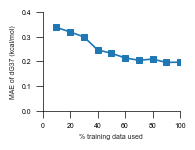

In [257]:
df = report_dict['use_train_set_ratio_sweep']
df['% training data used'] = df.use_train_set_ratio * 100
fig, ax = plt.subplots()
# kwargs = dict(x='epoch', y='value', estimator='median', errorbar=('pi', 95), ax=ax)
sns.lineplot(data=report_dict['use_train_set_ratio_sweep'], x='% training data used', y='dG_37_mae', 
             marker='s', markeredgecolor=None, )
# sns.lineplot(clean_df(report_dict['test_rmse']), label='test RMSE', **kwargs)
ax.set_xlim([0,100])
ax.set_ylim([0,.4])
# ax.set_xlabel('epoch')
ax.set_ylabel('MAE of dG37 (kcal/mol)')

util.beutify(ax, shrink=True, y_locator=.1)

util.save_fig('./fig/Fig5/test_200epoch_use_train_set_ratio_vs_dG_37_mae.pdf')